# Проект e-commerce
**Цель проекта** 

Проанализировать покупки в онлайн-магазине и в ходе исследования ответить на следующие вопросы:
- Сколько пользователей, совершивших покупку только один раз?
- Сколько заказов в месяц в среднем не доставляется по разным причинам (детализация по причинам)? 
- По каждому товару определить, в какой день недели товар чаще всего покупается?
- Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
- Используя pandas, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.
- Построить RFM-сегментацию пользователей, чтобы качественно оценить аудиторию. Для каждого RFM-сегмента построить границы метрик recency, freqency и monetary для интерпретации этих кластеров. 
Предварительно необходимо провести исследование данных и сформулировать, что должно считаться покупкой.

**Входные данные**

- Данные с уникальными идентификаторами пользователей (файл `olist_customers_datase.csv`)

    `customer_id` — позаказный идентификатор пользователя

    `customer_unique_id` —  уникальный идентификатор пользователя  (аналог номера паспорта)

    `customer_zip_code_prefix` —  почтовый индекс пользователя

    `customer_city` —  город доставки пользователя

    `customer_state` —  штат доставки пользователя
    

- Данные с заказами (файл `olist_orders_dataset.csv`)

    `order_id` —  уникальный идентификатор заказа (номер чека)

    `customer_id` —  позаказный идентификатор пользователя

    `order_status` —  статус заказа

    `order_purchase_timestamp` —  время создания заказа

    `order_approved_at` —  время подтверждения оплаты заказа

    `order_delivered_carrier_date` —  время передачи заказа в логистическую службу

    `order_delivered_customer_date` —  время доставки заказа

    `order_estimated_delivery_date` —  обещанная дата доставки
    

- Товарные позиции, входящие в заказы (файл `olist_order_items_dataset.csv`)

    `order_id` —  уникальный идентификатор заказа (номер чека)

    `order_item_id` —  идентификатор товара внутри одного заказа

    `product_id` —  ид товара (аналог штрихкода)

    `seller_id` — ид производителя товара

    `shipping_limit_date` —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

    `price` —  цена за единицу товара

    `freight_value` —  вес товара

## Обзор данных

In [1]:
# Импорт требуемых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import timedelta
import squarify

In [2]:
df_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-h-gajzetdinova/First_project/olist_customers_dataset.csv')
df_orders    = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-h-gajzetdinova/First_project/olist_orders_dataset.csv')
df_items     = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-h-gajzetdinova/First_project/olist_order_items_dataset.csv')

In [3]:
# Обзор датафрейма df_customers

df_customers.info()
df_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Обзор датафрейма df_orders

df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Обзор датафрейма df_items

df_items.info()
df_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Выводы**
  
Не во всех столбцах тип данных корректный: требуется скорректировать столбцы с датами. Также необходимо проанализировать таблцицы на наличие дубликатов. В датафрейме df_orders присутсвуют пропущенные значения, необходимо выяснить их природу и по возможности заполнить пропуски для корректного анализа данных. Отдельно проанализировать датафрейм df_orders для определения понятия "покупка".

Приступим к предобработке данных.

### Предобработка данных

In [6]:
# Преобразование строки в дату со временем датафрейма df_orders

df_orders[['order_purchase_timestamp',
           'order_approved_at', 
           'order_delivered_carrier_date',
           'order_delivered_customer_date', 
           'order_estimated_delivery_date']]= df_orders[[
           'order_purchase_timestamp',
           'order_approved_at', 
           'order_delivered_carrier_date',
           'order_delivered_customer_date', 
           'order_estimated_delivery_date']].apply(pd.to_datetime)

df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [7]:
# Преобразование строки в дату со временем датафрейма df_items

df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])

df_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [8]:
# Проверка на наличие дублей (дубли в датафреймах отсутствуют)

df_customers.duplicated().sum()
df_orders.duplicated().sum()
df_items.duplicated().sum()

0

***Задача 1. Определение понятия "покупка", подсчет количества пользователей, которые совершили покупку только один раз.***

In [10]:
# Проверка на наличие пропусков

df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Выявленные пропуски обнаружены в столбцах, которые отвечают за время, соответствующее статусу заказа. Учитывая, что в столбце "order_purchase_timestamp" (время создания заказа) пропуски отсутсвуют, допускаем тот факт, что полученное количество нулевых позиций - заказы, которые выполнены не "до конца". Для удобства анализа, оставим пропуски незаполненными. 
Посмотрим на статусы заказов.

In [11]:
#вывод уникальных статусов

df_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

- Согласно представленным сведениям, таблица содержит следующие статусы: 
    
    `created` —  создан
    
    `approved` —  подтверждён
    
    `invoiced` —  выставлен счёт
    
    `processing` —  в процессе сборки заказа
    
    `shipped` —  отгружен со склада
    
    `delivered` —  доставлен пользователю
    
    `unavailable` —  недоступен
    
    `canceled` —  отменён

Покупка- фактическое приобретение товара пользователем. Но, учитывая, что рассматривается интернет-магазин, в котором присутствует оплата товара онлайн (до фактического получения), считаем покупкой- факт оплаты заказа. А значит дата покупки - дата в столбце "order_approved_at".
Необходимо дополнительно проверить на каком этапе пользователи отменяют свои заказы (статус "canceled"), в случае если отмена произошла после покупки товара, то данная позиция считается отмененной. Проверим такие отмененные заказы.

In [12]:
# Вывод приобретенных (купленных) заказов со статусом "Отменен" 

df_orders.query('order_approved_at != "NaN" & order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,NaT,2018-08-22
...,...,...,...,...,...,...,...,...
98496,2be6c8b958e16856397259974d4abee9,ccbce7bcb13ee88adcf78890cae0ea42,canceled,2018-04-02 18:20:00,2018-04-02 18:30:38,NaT,NaT,2018-04-19
98629,f5f8998eee8ec7bc513dc52847d64ce0,f4656b824844a039a87fd9c51ad3586a,canceled,2018-03-01 11:42:23,2018-03-01 12:20:32,NaT,NaT,2018-03-20
98771,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30


Обнаружено больше 400 отмененных позиций после оплаты. Выведем отдельно покупки не отмененные пользователями и общее количество покупок (включая отмену после оплаты товара).

Объединим таблицу с уникальными идентификаторами пользователей и таблицу с заказами для выполнения задания.

In [13]:
# Объединение двух таблиц по ключу 'customer_id'

df_customers_unique = df_orders.merge(df_customers, on= 'customer_id')
df_customers_unique.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [16]:
# Просчет количества пользователей, совершивших только одну покупку (в том числе отмененную)


one_purchase_cancel = df_customers_unique.query('order_approved_at != "NaN"') \
                    .groupby('customer_unique_id', as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .query('order_id == 1') \
                    .customer_unique_id.count()

In [17]:
# Просчет количества пользователей, совершивших только одну покупку (не отмененную)


one_purchase = df_customers_unique.query('order_approved_at != "NaN" & order_status != "canceled"') \
                    .groupby('customer_unique_id', as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .query('order_id == 1') \
                    .customer_unique_id.count()

***1. Ответ:***
   - 93049 пользователей совершили только одну покупку
   - 92621 пользователей совершили только одну не отмененную покупку   

***Задача 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?***

Задание будет выполнено по таблице df_orders. Для начала проанализируем статусы заказов.

In [15]:
# Вывод уникальных статусов заказов и их соответсвующее количество

df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Проверим, все ли заказы выполняютcя в срок (проанализируем статусы delivered, shipped) и соответсвует ли статус "доставлено" фактическому выполнению работы

In [34]:
# Статус delivered: проверка наличия доставок не в срок

df_orders.query('order_status == "delivered" & order_estimated_delivery_date < order_delivered_customer_date').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02


In [35]:
# Статус delivered: дополнительная проверка статуса

df_orders.query('order_delivered_customer_date == "NaN" & order_status == "delivered"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24


In [36]:
# Статус shipped:  

df_orders.query('order_status == "shipped" & order_estimated_delivery_date < order_delivered_carrier_date').head()  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6997,1b76802b72eb5517c97481ee2f7b7037,85ac32af92e4e38adeaeb0653a085dfd,shipped,2017-02-08 08:48:43,2017-02-08 08:55:11,2017-03-14 11:00:52,NaT,2017-03-10
8813,cb503219f1a73d8a4dfe8561be373c99,921822ed81e9c094d7908db16164a270,shipped,2017-11-25 11:22:09,2017-11-25 11:35:20,2018-01-04 21:41:39,NaT,2017-12-21
19637,c108072ab31ec90a754129c171577f5f,a979b3cbd898fd8be91a290a667fd0d4,shipped,2017-10-16 21:13:03,2017-10-16 21:28:13,2017-10-26 20:40:20,NaT,2017-10-26
22143,38541d08d4eb7d571b5b80cb6ca9be03,937682b4176cf634c443714be31b5ca7,shipped,2017-11-24 21:36:30,2017-11-25 01:31:42,2018-01-04 21:07:51,NaT,2017-12-20
40266,19802314932831a78e4f0e3dead30f83,cc825baf36814fe3b4354455ef9a2335,shipped,2017-11-20 11:46:03,2017-11-20 12:10:25,2017-12-14 21:35:17,NaT,2017-12-13


Таким образом обнаружена большая часть заказов (7826шт.), которая доставлена не в срок по причине задержки доставки курьером. Также выявлены заказы (8шт.), которые находятся еще в процессе сборки, но уже не укладываются в обещанную дату доставки.
Некоторые заказы со статусом доставлен не имеет дату доставки (8шт)- будем считать данные заказы доставленными, полагая, что просто не успели внести время доставки заказа. 

Согласно условиям задания, необходимо вывести среднее количество недоставленных заказов с помесячной детализацией. В данном случае важно посмотреть именно на недоступные и отмененные заказы (статусы "unavailable" и "canceled" соответсвенно), по остальным статусам заказы находятся в обработке и на этапе проводимого мной анализа недоставленными их считать нельзя.  

In [37]:
#Создание столбца с предполагаемым годом и месяцем доставки (для дальнейшей детализации)

df_orders['year_month'] = df_orders['order_estimated_delivery_date'].dt.to_period("M")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [38]:
'''Детализация заказов по месяцам:
    фильтрация заказов
    группировка по статусу и дате
    подсчет количества заказов по статусу в месяц
    группировка по статусу, вывод среднего количества заказов в месяц
    округление значений'''

        

df_orders_not_deliver = df_orders \
                    .query('order_status == "unavailable" or  order_status == "canceled"') \
                    .groupby(['order_status', 'year_month'], as_index = False) \
                    .agg({'order_id': 'count'}) \
                    .groupby('order_status', as_index = False) \
                    .agg({'order_id': 'mean'}) \
                    .rename(columns={'order_id': 'count_mean_orders'}) \
                    .round(2)

***2. Ответ: ниже представлено среднее количество недоставленных заказов в месяц с детализацией по причинам***

In [39]:
df_orders_not_deliver

,order_status,count_mean_orders
0,canceled,24.04
1,unavailable,29.00


***Задача 3. По каждому товару определить, в какой день недели товар чаще всего покупается.***

In [40]:
# смерджили данные

df_products = df_orders.merge(df_items, how='left', on= 'order_id')
df_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [41]:
# Вывод только оплаченных заказов ("покупка", согласно п.1)

df_products = df_products.query('order_approved_at != "NaN"')

Оставили в датафрейме только те заказы, которые были оплачены покупателями. Датой покупки таких заказов будем считать время подтверждения оплаты заказа. Оставим только необходимые колонки для анализа и решения поставленной задачи

In [42]:
# Оставили только необходимые колонки, вывели дф

df_products = df_products[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_item_id', 'product_id']]
df_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,1.0,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,1.0,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,1.0,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,1.0,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0,65266b2da20d04dbe00c5c2d3bb7859e


In [43]:
# Т.к. необходима детализация по дням недели, добавим столбец 'weekday', содержащий данные из 'order_approved_at'

df_products['weekday'] = df_products['order_approved_at'].dt.day_name()
df_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,1.0,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,1.0,595fac2a385ac33a80bd5114aec74eb8,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,1.0,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


***3. Ответ: ниже представлены дни, когда каждый товар покупается чаще всего.***

In [44]:
'''Для вычисления наиболее популярного дня продаж для каждого товара воспользуемся модой: 
мода – значение признака, встречающееся чаще всего. 
В данном случае мода характеризует день, когда товар покупается чаще всего.'''

df_products_weekday = df_products.groupby('product_id', as_index=False).agg({'weekday': pd.Series.mode})
df_products_weekday.head()

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


Посмотрим на общую картину: как распределено количество покупок всех товаров по дням недели 

In [45]:
# Вывод общего количества приобретаемых товаров по дням

df_weekday = df_products.groupby('weekday', as_index=False) \
            .agg({'product_id': 'count'}) \
            .rename(columns={'product_id': 'count_products'}) \
            .sort_values('count_products')

df_weekday.head(7)

,weekday,count_products
3,Sunday,10057
2,Saturday,13839
1,Monday,14667
0,Friday,16719
4,Thursday,17706
6,Wednesday,17865
5,Tuesday,21782


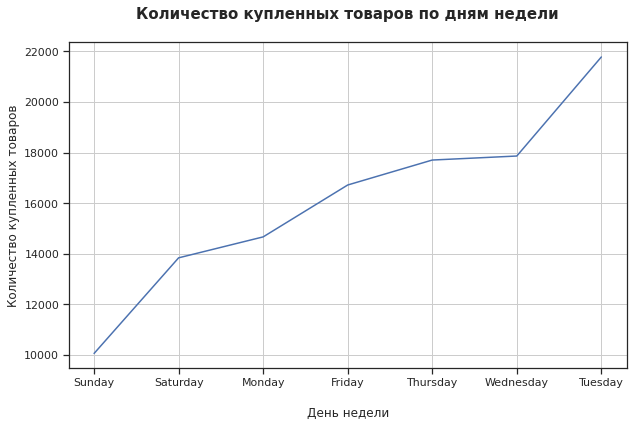

In [46]:
# Графическое отображение

sns.set(style="ticks")
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data = df_weekday, x = 'weekday', y = 'count_products')
plt.title("Количество купленных товаров по дням недели\n", fontsize=15, fontweight = 'bold')
plt.xlabel("\nДень недели")
plt.ylabel("Количество купленных товаров")
plt.grid()
plt.show()

По графику видно, что наименьшее количество приобретенных товаров приходится на выходные дни. В будни (особенно во вторник) пользователи чаще совершают покупки в магазине.

***4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.***

Воспользуемся таблицей "df_customers_unique", которая была подготовлена в рамках 1 задачи. Для начала оставим только оплаченные заказы (все "покупки" пользователей). 

In [47]:
# Фильтрация по времени оплаты заказа

df_customers_unique = df_customers_unique.query('order_approved_at != "NaN"')
df_customers_unique.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Для решения задачи потребуется информация о дате покупки и уникальные айди каждого пользователя, оставим в датафрейме только необходимые колонки для анализа и уберем лишнее.

In [48]:
# Вызов колонок датафрейма

df_customers_unique.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [49]:
# Вывод только требуемых колонок в датафрейм

df_customers_unique = df_customers_unique[[
                    'order_id', 
                    'customer_id', 
                    'order_status', 
                    'order_purchase_timestamp',
                    'order_approved_at', 
                    'customer_unique_id']]

In [50]:
''' Согласно условию задания необходимо вывести среднее количество покупок в неделю по месяцам. 
Создадим столбец "month" с указанием месяца покупки и столбец "weeks", который будет отражать количество недель в месяце '''

df_customers_unique['month'] = df_customers_unique['order_approved_at'].dt.strftime('%Y-%m')
df_customers_unique['weeks'] = df_customers_unique['order_approved_at'].dt.days_in_month 
df_customers_unique['weeks'] = round((df_customers_unique['weeks'] / 7), 2)

Функция Series.dt.days_in_month возвращает количество дней в месяце. Далее, для подсчета количества недель, разделили полученное значение на 7, округлили до 2х знаков после запятой.

In [51]:
# Вывод полученного датафрейма

df_customers_unique.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,customer_unique_id,month,weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,2017-10,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,2018-07,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,2017-11,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,4.00


Посчитаем количество покупок в неделю для каждого покупателя (в разрезе месяца)

In [52]:
# Вывод количества покупок для каждого пользователя в месяц

df_count_orders_month = df_customers_unique.groupby(['customer_unique_id', 'month', 'weeks'], as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .rename(columns={'order_id': 'count_orders'})
df_count_orders_month.head()

,customer_unique_id,month,weeks,count_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1


In [53]:
# Подсчет количества покупок в неделю в разрезе месяца

df_count_orders_month['count_orders_week'] = df_count_orders_month['count_orders'] / df_count_orders_month['weeks']
df_count_orders_month.head()

,customer_unique_id,month,weeks,count_orders,count_orders_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.225734
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.225734
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.233100


In [54]:
# Вывод среднего занчения количества покупок в неделю с детализаией по месяцам

df_mean_orders_month = df_count_orders_month.groupby(['customer_unique_id', 'month'], as_index= False) \
                    .agg({'count_orders_week' : 'mean'}) \
                    .rename(columns={'count_orders_week': 'mean_orders_week'}) \
                    .sort_values('mean_orders_week', ascending=False)

***3. Ответ: ниже представлено среднее количество покупок в неделю с детализацией по месяцам***

In [55]:
# Вывод ТОП-25 по среднему количеству 

df_mean_orders_month.head(25)

,customer_unique_id,month,mean_orders_week
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,1.354402
23910,3e43e6105506432c953e165fb2acf44c,2018-02,1.000000
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,1.000000
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02,1.000000
14471,25a560b9a6006157838aab1bdbd68624,2017-04,0.932401
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09,0.932401
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,0.902935
76689,c8460e4251689ba205045f3ea17884a1,2018-08,0.902935
81071,d3882d7abd0c66064d740d7ed04dd1ef,2018-02,0.750000
71440,ba87a137c5191264841e0be40e53f4ed,2018-02,0.750000


Т.к. среднее значение чувствительно к выбросам и зачастую не корректно отражает картину, посмотрим на описательную статистику  количества покупок в месяц, чтобы сделать окончательный вывод.

In [56]:
df_count_orders_month['count_orders'].describe()

count    97912.000000
mean         1.013982
std          0.124098
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: count_orders, dtype: float64

Полученная статистика показывает, что среднее не сильно отличается от медианного значения, а значит выбросы в наших показаних отсутсвуют. Количество покупок в целом распределено равномерно (1-3 квартили стремятся к среднему значению).

***5. Используя pandas, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.***

Для проведения работы по заданию потребуется информация из таблиц с заказами и пользователями. Объединим данные таблицы и приступим к анализу 

In [108]:
df_cohort = df_customers.merge(df_orders, on = 'customer_id', how= 'left')
df_cohort.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-06
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-02
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-04
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-08


Для того, чтобы провести когортный анализ пользователей, определим четыре основные параметра необходимые для работы:
- Признак формирования когорты: покупка (ориентируемся на определение "покупка" из  п.1)
- Размер когорты — временной интервал: согласно условиям задания это будет месяц покупки
- Отчетный период: год (с января по декабрь)
- Анализируемый ключевой показатель: Retention Rate

Далее скорректируем полученный объединенный датафрейм- оставим только необходимые для анализа колонки. Добавим колонку месяц покупки, найдем первую дату покупки для каждого пользователя.

In [109]:
# Вывод требуемых для анализа колонок датафрейма

df_cohort = df_cohort[['customer_unique_id', 'order_approved_at']].query('order_approved_at != "NaN"')
df_cohort.head()

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09


In [110]:
# Создание столбца "month" с указанием месяца покупки 

df_cohort['month'] = df_cohort['order_approved_at'].dt.strftime('%Y-%m')
df_cohort.head()

,customer_unique_id,order_approved_at,month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,2018-07



На основании табличных данных сложно понять, как распределено количество покупок пользователей в месяц (обозначенная когорта), построим график, чтобы оценить данный показатель и выяснить размер временного периода датафрейма

In [111]:
# Вывод количества покупок пользователей в разрезе месяца

df_orders_month = df_cohort.groupby('month', as_index=False) \
                    .agg({'customer_unique_id': 'count'}) \
                    .rename(columns={'customer_unique_id':'orders_month'}) \
                    .sort_values('month')

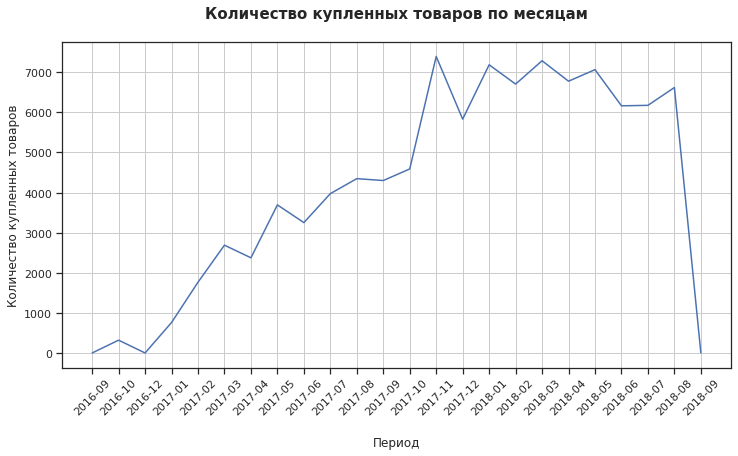

In [112]:
# Графическое отображение

sns.set(style="ticks")
fig, ax = plt.subplots(figsize = (12, 6))
sns.lineplot(data = df_orders_month, x = 'month', y = 'orders_month')
plt.title("Количество купленных товаров по месяцам\n", fontsize=15, fontweight = 'bold')
plt.xlabel("\nПериод")
plt.ylabel("Количество купленных товаров")
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.grid()
plt.show()

По графику видно, что данные за 2016г. и 2018г. представлены не полностью. Для проведения когортного анализа необходим период январь - декабрь, соответсвенно в работу возьмем 2017г. (для того, чтобы вычислить retention в декабре 2017г. также нужно захватить первые три месяца 2018г.)  

In [113]:
# Создание столбца "first_date" с указанием даты первой покупки по каждому пользователю

df_cohort['first_date'] = df_cohort.groupby('customer_unique_id')['month'].transform('min')
df_cohort.head()

,customer_unique_id,order_approved_at,month,first_date
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,2018-07,2018-07


In [114]:
# Вывод общего количества пользователей, совершивших покупку по месяцам 

customers_cohort = df_cohort.groupby('first_date').agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'all_customers'})
customers_cohort.head()

,all_customers
first_date,
2016-09,1
2016-10,317
2016-12,1
2017-01,726
2017-02,1736


In [115]:
# Подсчет количества уникальных пользователей для каждой когорты (месяцу)

df_cohort = df_cohort \
            .groupby(['first_date', 'month'], as_index=False) \
            .customer_unique_id.nunique() \
            .rename(columns={'customer_unique_id': 'count_customers'})
df_cohort.head()

,first_date,month,count_customers
0,2016-09,2016-09,1
1,2016-10,2016-10,317
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1


In [116]:
# Объединение полученных таблиц

df_cohorts = df_cohort.merge(customers_cohort, how='left', on='first_date')
df_cohorts.head()

,first_date,month,count_customers,all_customers
0,2016-09,2016-09,1,1
1,2016-10,2016-10,317,317
2,2016-10,2017-04,1,317
3,2016-10,2017-07,1,317
4,2016-10,2017-09,1,317


In [121]:
# Преобразование временных столбцов в дату

df_cohorts[['first_date', 'month']] = df_cohorts[['first_date', 'month']].apply(pd.to_datetime)

In [122]:
# Расчет длительности (месяцев) между первой и повторной покупкой

df_cohorts['period'] = df_cohorts['month'].dt.to_period('M').astype(int) - df_cohorts['first_date'].dt.to_period('M').astype(int)
df_cohorts.head()

,first_date,month,count_customers,all_customers,CRR,period
12,2017-01-01,2017-01-01,726,726,100.00,0
13,2017-01-01,2017-02-01,4,726,0.55,1
14,2017-01-01,2017-03-01,2,726,0.28,2
15,2017-01-01,2017-04-01,1,726,0.14,3
16,2017-01-01,2017-05-01,3,726,0.41,4


In [123]:
# В анализе будут усчастовать когорты только за 2017 год (дополнительно включено 3 месяца 2018г, для вычисления CRR за весь 2017г.)

df_cohorts = df_cohorts.query('"2016-12" < first_date < "2018-01" and month < "2018-04"')
df_cohorts.head()

,first_date,month,count_customers,all_customers,CRR,period
12,2017-01-01,2017-01-01,726,726,100.00,0
13,2017-01-01,2017-02-01,4,726,0.55,1
14,2017-01-01,2017-03-01,2,726,0.28,2
15,2017-01-01,2017-04-01,1,726,0.14,3
16,2017-01-01,2017-05-01,3,726,0.41,4


In [124]:
# Вычисление коэффициента удержания пользоватедлей CRR

df_cohorts['CRR']=round(df_cohorts.count_customers/df_cohorts.all_customers*100, 2)
df_cohorts.head()

,first_date,month,count_customers,all_customers,CRR,period
12,2017-01-01,2017-01-01,726,726,100.00,0
13,2017-01-01,2017-02-01,4,726,0.55,1
14,2017-01-01,2017-03-01,2,726,0.28,2
15,2017-01-01,2017-04-01,1,726,0.14,3
16,2017-01-01,2017-05-01,3,726,0.41,4


In [125]:
# Преобразование временных столбцов в дату

df_cohorts['first_date'] = df_cohorts['first_date'].dt.date

In [126]:
'''Создание сводной таблицы: 
индексы - первая дата покупки, 
столбцы — длительность после первой покупки(период),
значения — коэффициент удержания пользователей '''

cohort_customers_pivot = df_cohorts.pivot(index='first_date', columns = 'period', values = 'CRR')
cohort_customers_pivot

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_date,,,,,,,,,,,,,,,
2017-01-01,100.0,0.55,0.28,0.14,0.41,0.14,0.55,0.14,0.14,NaN,0.28,0.28,0.83,0.41,0.14
2017-02-01,100.0,0.23,0.23,0.17,0.40,0.12,0.23,0.17,0.12,0.23,0.12,0.29,0.17,0.17,NaN
2017-03-01,100.0,0.49,0.34,0.34,0.34,0.15,0.15,0.30,0.30,0.11,0.38,0.15,0.23,NaN,NaN
2017-04-01,100.0,0.60,0.22,0.17,0.30,0.26,0.34,0.26,0.34,0.17,0.22,0.09,NaN,NaN,NaN
2017-05-01,100.0,0.53,0.50,0.39,0.31,0.33,0.42,0.17,0.25,0.31,0.28,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.48,0.35,0.41,0.25,0.35,0.38,0.22,0.13,0.22,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,0.52,0.34,0.21,0.34,0.18,0.31,0.10,0.18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,0.67,0.36,0.26,0.38,0.52,0.26,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,0.65,0.48,0.34,0.43,0.27,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


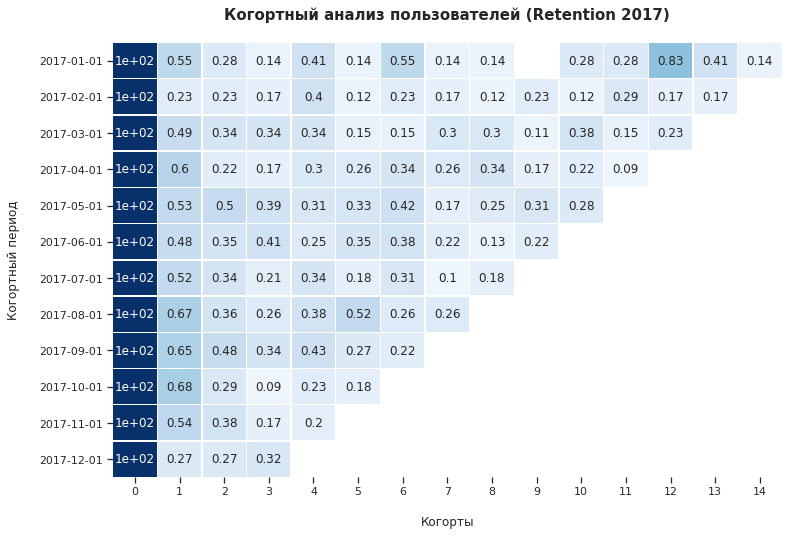

In [127]:
'''Графическое отображение с помощью Heatmap: 
интенсивность ячейки пропорциональна значению, благодаря чему наглядно понятна картина выведенных результатов ''' 

cmap = sns.cm.rocket_r
sns.set(style='ticks')
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_customers_pivot, annot=True, vmin=0, vmax=2, center= 1, cmap='Blues', linewidths=0.3, cbar= False)
plt.title('Когортный анализ пользователей (Retention 2017)\n', fontsize=15, fontweight = 'bold')
plt.xlabel('\nКогорты')
plt.ylabel('Когортный период\n')
plt.show()

In [128]:
# Вывод даты с максимальным значением CRR на третий месяц после первой покупки (period=2, т.к. отчет с нуля)

cohort_customers_pivot[2].idxmax()

datetime.date(2017, 5, 1)

In [129]:
# Вывод максимального значения CRR на третий месяц рассматриваемого периода (period=2, т.к. отчет с нуля)

cohort_customers_pivot[2].max()

0.5

Полученные данные отражают достаточно низкий коэффициент удержания пользователей: покупатели практически не возвращаются за повторной покупкой. 

***5. Ответ: Когорта с максимальным значением CRR на третий месяц рассматриваемого периода выявлена в 05-2017 со значением 0,5%***

***Задача 6. Построить RFM-сегментацию пользователей, чтобы качественно оценить аудиторию. 
Для каждого RFM-сегмента построить границы метрик recency, freqency и monetary для интерпретации этих кластеров.***

Чтобы получить оценку RFM клиента, нам нужно сначала рассчитать оценки R, F и M:

- Рассчитать Recency: время от последней покупки пользователя до текущей даты; 
- Рассчитать Freqency: суммарное количество покупок у пользователя за всё время;
- Рассчитать Monetary: сумма покупок за всё время.

In [130]:
# Расчет общей стоимости каждого заказа 

orders_prise = df_items.groupby('order_id', as_index=False).agg({'price': 'sum'})  

In [131]:
# Соединение рассчитанной стоимости заказа с таблицей "покупок"

all_orders = orders_prise.merge(df_orders.query('order_approved_at != "NaN" & order_status != "canceled"'), on = 'order_id')  
all_orders = all_orders[['order_id', 'customer_id', 'order_approved_at', 'price']]
all_orders.head()

,order_id,customer_id,order_approved_at,price
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 09:45:35,58.90
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 11:05:13,239.90
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:48:30,199.00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:10:18,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 14:10:13,199.90


In [132]:
# Добавление информации о пользователях- присоединение третьего датафрейма

all_table = df_customers.merge(all_orders, on = 'customer_id')
all_table = all_table[['order_id', 'customer_unique_id', 'customer_id', 'order_approved_at', 'price']]
all_table.head()

,order_id,customer_unique_id,customer_id,order_approved_at,price
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12,124.99
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32,289.00
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10,139.94
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19,149.94
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09,230.00


In [133]:
all_table.dtypes

order_id                      object
customer_unique_id            object
customer_id                   object
order_approved_at     datetime64[ns]
price                        float64
dtype: object

Приступим к оценке RFM клиента. 
Для начала рассчитаем **Recency**- время от последней покупки пользователя до текущей даты

In [134]:
# Создание столбца с количеством дней с последней покупки

now = all_table['order_approved_at'].max() + timedelta(days=1)
all_table['recency'] = all_table['order_approved_at'].apply(lambda x: (now - x).days)
all_table.head()

,order_id,customer_unique_id,customer_id,order_approved_at,price,recency
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12,124.99,476
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32,289.00,234
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10,139.94,107
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19,149.94,175
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09,230.00,37


Рассчитаем **Freqency**- суммарное количество покупок у пользователя за всё время

In [135]:
freqency = all_table.groupby('customer_unique_id', as_index=False) \
                                 .agg({'customer_id': 'count'}) \
                                 .rename(columns={'customer_id': 'freqency'})
freqency.head()

,customer_unique_id,freqency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


Рассчитаем **Monetary**- сумма покупок за всё время

In [136]:
monetary = all_table.groupby('order_id', as_index=False) \
                                 .agg({'price': 'sum'}) \
                                 .rename(columns={'price': 'monetary'})
monetary.head()

,order_id,monetary
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [137]:
# Вывод итогового датафрейма, содержащего оценки R, F и M

rfm = all_table.merge(freqency, on = 'customer_unique_id').merge(monetary, on = 'order_id')
rfm.head()

,order_id,customer_unique_id,customer_id,order_approved_at,price,recency,freqency,monetary
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12,124.99,476,1,124.99
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32,289.00,234,1,289.00
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10,139.94,107,1,139.94
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19,149.94,175,1,149.94
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09,230.00,37,1,230.00


In [138]:
# Вывод квартилей по метрикам R, F и M

quantiles = rfm[['recency', 'freqency', 'monetary']].quantile([.25, .50, .75])
quantiles

,recency,freqency,monetary
0.25,122.0,1.0,45.9
0.50,227.0,1.0,86.9
0.75,355.0,1.0,149.9


Параметр freqency не показательный для вывода по группам, по всей видимости большинство пользователей совершили только одну покупку. Рассмотрим более подробно данную метрику, чтобы понять, как сформировать группы по freqency.
Остальные параметры (recency, monetary) формируем в группы по квартилям. 

In [139]:
rfm.freqency.value_counts()

1     92090
2      5300
3       564
4       116
5        45
6        30
7        21
16       16
9         9
Name: freqency, dtype: int64

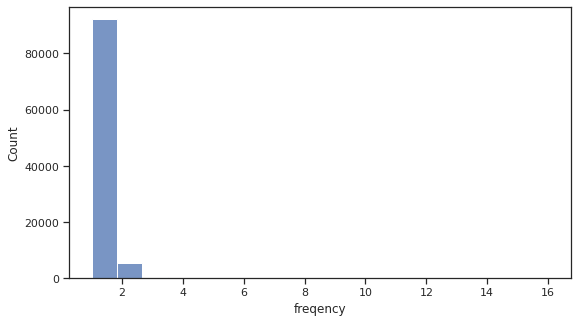

In [140]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(rfm.freqency, kde=False)
plt.show()

Распределение метрики freqency не нормальное, большая часть пользователей совершили одну покупку. Более чем 4 покупки, совершили единицы. 
В связи с этим разделим данную метрику на следующие группы:

`1` - одна покупка;
`2` - две покупки;
`3` - три или четыре покупки; 
`4` - более четырех покупок.

In [141]:
#Присовение рангов каждому покупателю по метрикам recency, freqency и monetary

def r_score(recency):
    if recency <= quantiles.recency[0.25]:
        return 4
    elif recency <= quantiles.recency[0.5]:
        return 3
    elif recency <= quantiles.recency[0.75]:
        return 2
    else:
        return 1
    
def f_score(freqency):
    if freqency == 1:
        return 1
    elif freqency == 2:
        return 2
    elif freqency == 3 or freqency == 4:
        return 3
    else:
        return 4
    
def m_score(monetary):
    if monetary <= quantiles.monetary[0.25]:
        return 1
    elif monetary <= quantiles.monetary[0.5]:
        return 2
    elif monetary <= quantiles.monetary[0.75]:
        return 3
    else:
        return 4

In [142]:
# Создание столбцов, с соответсвии с группированием параметров

rfm['r'] = rfm.recency.apply(r_score)
rfm['f'] = rfm.freqency.apply(f_score)
rfm['m'] = rfm.monetary.apply(m_score)
rfm.head()

,order_id,customer_unique_id,customer_id,order_approved_at,price,recency,freqency,monetary,r,f,m
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12,124.99,476,1,124.99,1,1,3
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32,289.00,234,1,289.00,2,1,4
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10,139.94,107,1,139.94,4,1,3
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19,149.94,175,1,149.94,3,1,4
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09,230.00,37,1,230.00,4,1,4


In [143]:
# Создание столбца RFM_Score

rfm['RFM_Score'] = rfm['r'].map(str) + rfm['f'].map(str) + rfm['m'].map(str)
rfm.head()

,order_id,customer_unique_id,customer_id,order_approved_at,price,recency,freqency,monetary,r,f,m,RFM_Score
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12,124.99,476,1,124.99,1,1,3,113
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32,289.00,234,1,289.00,2,1,4,214
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10,139.94,107,1,139.94,4,1,3,413
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19,149.94,175,1,149.94,3,1,4,314
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09,230.00,37,1,230.00,4,1,4,414


Итого мы получили 4^3= 64 сегмента, что довольно трудно обработать.  Для сокращения трудозатрат по обработке данных, целесообразно будет разделить пользователей на кластеры в зависимости от показателей рассматриваемых метрик RFM.

- Champions (R-score 3-4; F-score 3-4; M-score 3-4)
- Perspectival (R-score 3-4; F-score 1-2; M-score 3-4)
- New_customers (R-score 3-4; F-score 1-2; M-score 1-2)
- About_to_sleep (R-score 1-2; F-score 2-4; M-score 1-4)
- Lost_big (R-score 1-2; F-score 1; M-score 3-4)
- Lost_small (R-score 1-2; F-score 1; M-score 1-2)
- Potential_loyalists (R-score 3-4; F-score 3-4; M-score 1-2)

In [144]:
# Выделение сегментов пользователей

segments = {
    r'[3-4][3-4][2-4]': 'Champions',
    r'[3-4][1-2][3-4]': 'Perspectival',
    r'[3-4][1-2][1-2]': 'New_customers',
    r'[1-2][2-4][1-4]': 'About_to_sleep',
    r'[1-2]1[3-4]': 'Lost_big',
    r'[1-2]1[1-2]': 'Lost_small',
    r'[3-4][3-4][1-2]': 'Potential_loyalists'}

rfm['segment'] = rfm['RFM_Score'].replace(segments, regex=True)
rfm.sort_values('segment')

,order_id,customer_unique_id,customer_id,order_approved_at,price,recency,freqency,monetary,r,f,m,RFM_Score,segment
69381,71853944ebfe6bd5f5de0302cba14354,096e351116755fe4c3c1e48eaf301a41,57488cc627f8aef89c99cd5d8c3134f1,2017-05-16 11:02:34,105.90,476,2,105.90,1,2,3,123,About_to_sleep
30178,cb162de51da6fe9c49b238971804a224,b9fc2d4c90bdadc7052fabe8353084ed,309239af9998f640f8572abd96482709,2017-12-18 14:51:36,56.99,260,2,56.99,2,2,2,222,About_to_sleep
30179,8eb3ea8875ea46e1d2631a59a278e059,b9fc2d4c90bdadc7052fabe8353084ed,822d3f50f2d532e37c9fbdb13cce5f77,2017-12-18 14:51:20,56.99,260,2,56.99,2,2,2,222,About_to_sleep
30186,3d8548cd4cec4412f9007bf10e67b70f,c9c7f143771017a9c61af26f7291f7a5,58c39b85579b280bb8c173de81749e7f,2017-11-28 17:35:47,104.22,280,2,104.22,2,2,3,223,About_to_sleep
30187,f3c3a2ca4f66b5a0c400b09a1e795d57,c9c7f143771017a9c61af26f7291f7a5,9f2890f4503f464eded4a6886d54bd0e,2017-11-28 17:36:38,69.99,280,2,69.99,2,2,2,222,About_to_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27873,67d3db1e6d9adab9c49e67e8a2e65b8f,e0836a97eaae86ac4adc26fbb334a527,f7224426a8a68eda1674c2b84be34da2,2018-08-01 03:32:08,14.49,34,3,14.49,4,3,1,431,Potential_loyalists
14599,bb009fab515024781676004c4924f54d,0b18593e033697810a62a987e77f4b8c,d2d1c74bca444a6750b9ac7de001953c,2018-03-14 02:35:39,44.90,174,3,44.90,3,3,1,331,Potential_loyalists
27874,c765302c18a92bcea0bc5c976bae0174,e0836a97eaae86ac4adc26fbb334a527,f63b99a7b32694f5b1f0a4171478cd21,2018-06-29 02:53:13,14.49,67,3,14.49,4,3,1,431,Potential_loyalists
50340,a383762bd79949e1b34878460042cd23,35ecdf6858edc6427223b64804cf028e,e6cf45b6775e86a43908d40341b3d53d,2018-03-31 21:35:09,39.98,156,5,39.98,3,4,1,341,Potential_loyalists


In [145]:
#Создание датафрейма для визуализации по количеству пользователей

rfm_segments = rfm.groupby('segment', as_index=False) \
                    .agg({'customer_unique_id':'count'}) \
                    .rename(columns={'customer_unique_id':'count'}) \
                    .sort_values('count')
rfm_segments

,segment,count
6,Potential_loyalists,88
1,Champions,237
0,About_to_sleep,3445
2,Lost_big,22657
3,Lost_small,22891
4,New_customers,24281
5,Perspectival,24592


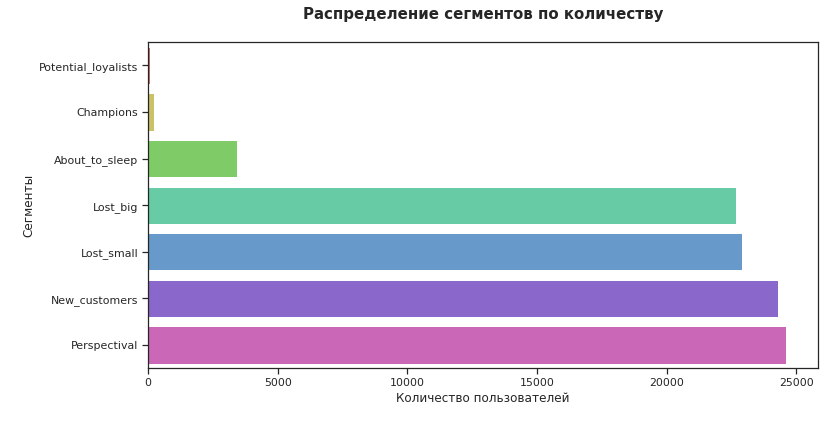

In [146]:
# Визуальное отображение полученных сегментов по количеству пользователей

plt.subplots(figsize = (12, 6))
sns.barplot(data = rfm_segments, x = 'count', y = 'segment', palette= 'hls')
plt.ylabel("\nСегменты")
plt.xlabel("Количество пользователей\n")
plt.title("Распределение сегментов по количеству\n", fontsize=15, fontweight = 'bold')
plt.show()

In [147]:
#Создание датафрейма для визуализации по принесенным деньгам

rfm_monetary = rfm[['segment', 'monetary']].sort_values('segment', ascending=False)
rfm_monetary.head()

,segment,monetary
53963,Potential_loyalists,35.8
8859,Potential_loyalists,42.9
2675,Potential_loyalists,29.9
5892,Potential_loyalists,45.9
19820,Potential_loyalists,22.0


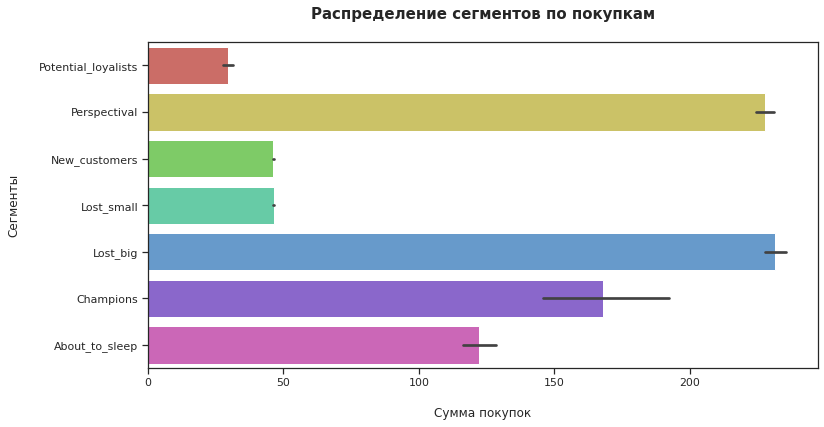

In [149]:
#  Визуальное отображение суммы покупок по каждому сегменту пользователей

plt.subplots(figsize = (12, 6))
sns.barplot(data = rfm_monetary, x = 'monetary', y = 'segment', palette= 'hls')
plt.xlabel("\nСумма покупок")
plt.ylabel("Сегменты\n")
plt.title("Распределение сегментов по покупкам\n", fontsize=15, fontweight = 'bold')
plt.show()

Согласно проведенному анализу пользователей можно сделать вывод, что:
- магазин имеет достаточно много перспективных и новых пользователей (около 24.000 человек)
- большой объем пользователей занимают ушедшие клиенты как с большими, так и с маленькими заказами (около 23.000 человек).

Для увеличения объема продаж необходимо разработать маркетинговую стратегию с целью удержания перспективных и увеличения новых клиентов. Т.к. сегмент представляющий перспективных пользователей приносит максимальную прибыль, целесообразно выдать карту лояльности таким покупателям. Новые и ушедшие клиенты также требуют дополнительного внимания, для этих сегментов подойдёт проведение акций, показ дополнительной рекламы и рекомендаций.
Большая часть пользователей совершает только одну покупку и больше не возвращается, возможно это связано с тем, что товары не повседневного спроса или покупатели пользуются скидкой за первый заказ и более не интересуются магазином. 
Необходимо разработать бизнес-модель для увеличения объема продаж и привлечения новых покупателей.  